<a href="https://colab.research.google.com/github/RaihanFebrian01/PortofolioData/blob/main/KodingTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1qJkabnTQorCao6fGv30m-EFH6C5bCECi/edit?usp=sharing&ouid=108355656034658002761&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_data = pd.read_excel(path)

In [ ]:
df_data.head()

,rentangumur,sex,benjolan di kelopak mata,berair,berkabut,DM,ganjal,gatal,HD,HT,...,nyeri,penglihatan kabur,pusing,sakit,sekret,silau,terkena percikan api,terlalu lama mata melihat layar,tidak nyaman,Diagnosa
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,konjungtivitis
1,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,konjungtivitis
2,2,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,konjungtivitis
3,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,konjungtivitis
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,konjungtivitis


In [ ]:
print(df_data.isnull().sum())

rentangumur                        0
sex                                0
benjolan di kelopak mata           0
berair                             0
berkabut                           0
DM                                 0
ganjal                             0
gatal                              0
HD                                 0
HT                                 0
kacamata tidak bisa dipakai        0
kelopak merah                      0
kering                             0
kontrol                            0
kotor                              0
mata kabur liat dekat              0
mata kemasukan benda asing         0
mata kemasukan gram                0
mata merah                         0
mata panas                         0
melihat bayangan hitam berjalan    0
nyeri                              0
penglihatan kabur                  0
pusing                             0
sakit                              0
sekret                             0
silau                              0
t

In [ ]:
# Check Balance of data
print(df_data['Diagnosa'].value_counts(normalize=True))

hordeolum               0.278884
syndroma mata kering    0.203187
presbiopia              0.175299
katarak imatur          0.155378
corpus alineum          0.095618
konjungtivitis          0.091633
Name: Diagnosa, dtype: float64


In [ ]:
# Import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

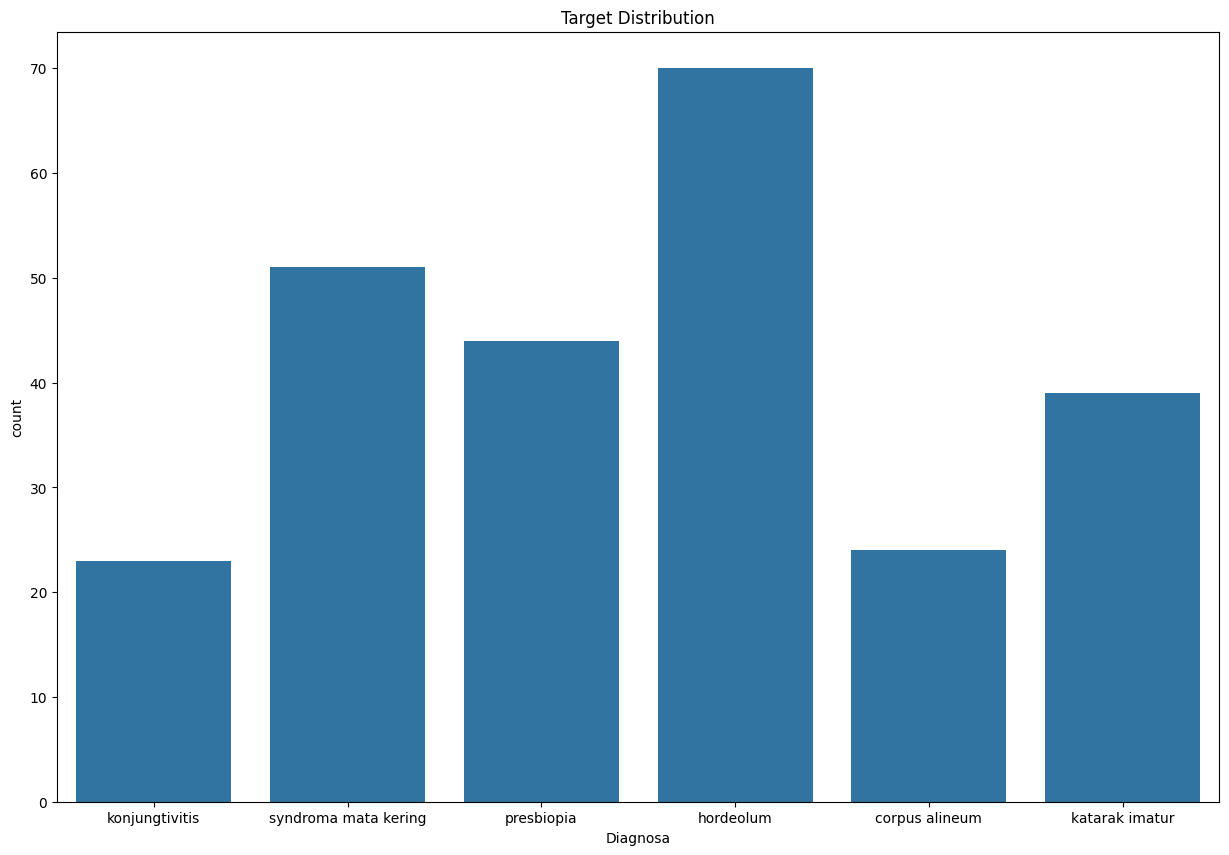

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(15, 10))
sns.countplot(x='Diagnosa', data=df_data)
plt.title('Target Distribution')
# plt.xlabel('Diagnosis (1 = Malignant, 1 = Benign)')
plt.show()

In [ ]:
# plt.figure(figsize=(15, 15))
# sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# Pairplot (use only a few selected features to avoid clutter)
# selected_features = ['rentangumur','sex', 'benjolan di kelopak mata','berair','berkabut','DM', 'ganjal','gatal','HD','HT','kacamata tidak bisa dipakai','kelopak merah', 'kering', 'kontrol','kotor','mata kabur liat dekat','mata kemasukan benda asing','mata kemasukan gram','mata merah','mata panas','melihat bayangan hitam berjalan','nyeri','penglihatan kabur','pusing','sakit','sekret','silau','terkena percikan api','terlalu lama mata melihat layar','tidak nyaman']
# sns.pairplot(df_data, vars=selected_features, hue='Diagnosa', diag_kind='hist')
# plt.show()


## **Gausian NB**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
max_random_state = 200  # Ganti dengan nilai maksimum yang sesuai
target_accuracy = 0.93
best_accuracy = 0.0
best_random_state = 0

In [ ]:
# Split the data into training and testing sets
X = df_data.drop('Diagnosa', axis=1)
y = df_data['Diagnosa']
for i in range(1, max_random_state + 1):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
  # Define the parameter grid for var_smoothing
  param_grid = {'var_smoothing': np.logspace(-10, -1, 10)}
  # Create a Gaussian Naive Bayes classifier instance
  gnb = GaussianNB()
  # Create the GridSearchCV instance with the classifier and parameter grid
  grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy')
  # Fit the GridSearchCV instance on the training data
  grid_search.fit(X_train, y_train)
  # Get the best parameters and corresponding accuracy
  best_params = grid_search.best_params_
  best_accuracy = grid_search.best_score_
  #print("Best parameters found: ", best_params)
  #print("Best accuracy found: {:.2f}%".format(best_accuracy * 100))
  best_gnb = grid_search.best_estimator_
  y_pred = best_gnb.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy*100)
  # print(f"Random State: {i}, Accuracy: {accuracy*100}")
  if accuracy >= target_accuracy:
        best_accuracy = accuracy
        best_random_state = i
        print(f"Akurasi mencapai target ({target_accuracy}) dengan random state {i}")
        break
print(f"Akurasi terbaik ({best_accuracy*100}) dicapai dengan random state {best_random_state}")

81.57894736842105
84.21052631578947
82.89473684210526
76.31578947368422
78.94736842105263
92.10526315789474
81.57894736842105
82.89473684210526
84.21052631578947
80.26315789473685
84.21052631578947
81.57894736842105
76.31578947368422
81.57894736842105
81.57894736842105
77.63157894736842
88.1578947368421
80.26315789473685
78.94736842105263
76.31578947368422
81.57894736842105
68.42105263157895
73.68421052631578
80.26315789473685
78.94736842105263
81.57894736842105
76.31578947368422
73.68421052631578
89.47368421052632
80.26315789473685
80.26315789473685
84.21052631578947
77.63157894736842
76.31578947368422
85.52631578947368
76.31578947368422
80.26315789473685
77.63157894736842
82.89473684210526
82.89473684210526
75.0
78.94736842105263
73.68421052631578
77.63157894736842
80.26315789473685
81.57894736842105
78.94736842105263
81.57894736842105
80.26315789473685
82.89473684210526
84.21052631578947
82.89473684210526
73.68421052631578
90.78947368421053
81.57894736842105
82.89473684210526
81.578

In [ ]:
len(X_test)

76

In [ ]:
# Print the classification report
print("\nClassification Report (with best parameters):")
print(classification_report(y_test, y_pred))


Classification Report (with best parameters):
                      precision    recall  f1-score   support

      corpus alineum       1.00      0.88      0.93         8
           hordeolum       1.00      1.00      1.00        23
      katarak imatur       0.90      0.90      0.90        10
      konjungtivitis       1.00      0.88      0.93         8
          presbiopia       0.80      0.92      0.86        13
syndroma mata kering       0.93      0.93      0.93        14

            accuracy                           0.93        76
           macro avg       0.94      0.92      0.93        76
        weighted avg       0.94      0.93      0.94        76



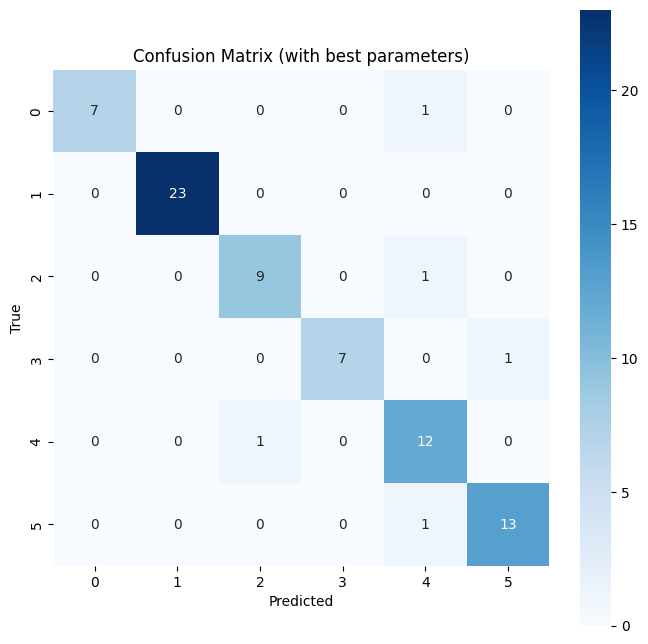

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix (with best parameters)")
plt.show()

In [ ]:
import pickle
with open('gnb_pickle.pkl','wb') as r:
  pickle.dump(grid_search, r)

In [ ]:
with open('gnb_pickle.pkl','rb') as r:
  gnbp=pickle.load(r)

In [ ]:
best_gnb = gnbp.best_estimator_
y_pred = best_gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy : {:.2f}%".format(accuracy * 100))


Accuracy : 93.42%


In [ ]:
# prediksi_nb=pd.read_csv('dataFIXED_TA.csv')
# prediksi_nb

In [ ]:
# prediksi_nb.head()

In [ ]:
# prediksi_nb.drop('Diagnosa',axis=1, inplace=True)
# prediksi_nb

In [ ]:
# new_predicted_nb = pd.DataFrame(gnbp.predict(prediksi_nb), columns = ['Prediksi_NB'])
# new_predicted_nb.reset_index()
# new_predicted_nb

In [ ]:
# pred_new_DIagnosis = pd.concat([prediksi_nb, new_predicted_nb], axis=1)
# pred_new_DIagnosis

In [ ]:
# pred_new_DIagnosis.to_csv('new_Diagnosis_prediction1.csv', index=False)

In [ ]:
# newprediksi=[[2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]]
# gnbp.predict(newprediksi)

# **Bernoulli NB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
max_random_state = 200  # Ganti dengan nilai maksimum yang sesuai
target_accuracy = 1
best_accuracy = 0.0
best_random_state = 0

In [ ]:
X = df_data.drop('Diagnosa', axis=1)
y = df_data['Diagnosa']
for i in range(1, max_random_state + 1):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=i)
  bnb=BernoulliNB()
  bnb.fit(X_train,y_train)
  bnb_pred=bnb.predict(X_test)
  acc_bnb = metrics.accuracy_score(y_test, bnb_pred)
  prec_bnb = metrics.precision_score(y_test, bnb_pred, average='micro')
  rec_bnb = metrics.recall_score(y_test, bnb_pred, average='micro')
  f1_bnb = metrics.f1_score(y_test, bnb_pred, average='micro')
  print(acc_bnb*100)
  # print("\nAccuracy Terbaik: {:.2f}%".format(acc_bnb*100),i)
  # print("\nPrecision Terbaik: {:.2f}%".format(prec_bnb*100))
  # print("\nRecall Terbaik: {:.2f}%".format(rec_bnb*100))
  # print("\nF1Score Terbaik: {:.2f}%".format(f1_bnb*100))
  if acc_bnb >= target_accuracy:
    best_accuracy = acc_bnb
    best_random_state = i
    print(f"Akurasi mencapai target ({target_accuracy}) dengan random state {i}")
    break
print(f"Akurasi terbaik ({best_accuracy*100}) dicapai dengan random state {best_random_state}")
print("\nPrecision Terbaik: {:.2f}%".format(prec_bnb*100))
print("\nRecall Terbaik: {:.2f}%".format(rec_bnb*100))
print("\nF1Score Terbaik: {:.2f}%".format(f1_bnb*100))

70.86092715231787
74.17218543046357
73.50993377483444
68.21192052980133
74.17218543046357
80.79470198675497
71.52317880794702
80.13245033112582
71.52317880794702
80.79470198675497
72.84768211920529
73.50993377483444
64.90066225165563
74.83443708609272
82.11920529801324
76.15894039735099
75.49668874172185
66.88741721854305
78.1456953642384
76.15894039735099
80.79470198675497
74.83443708609272
72.84768211920529
76.15894039735099
70.86092715231787
81.45695364238411
71.52317880794702
76.82119205298014
76.15894039735099
80.13245033112582
71.52317880794702
68.87417218543047
78.80794701986756
79.47019867549669
75.49668874172185
70.19867549668875
73.50993377483444
74.83443708609272
76.82119205298014
80.79470198675497
68.87417218543047
79.47019867549669
74.17218543046357
79.47019867549669
76.82119205298014
74.83443708609272
73.50993377483444
76.82119205298014
72.18543046357617
69.5364238410596
76.15894039735099
72.84768211920529
82.11920529801324
73.50993377483444
68.87417218543047
72.847682119

In [ ]:
# len(X_test)

In [ ]:
# cm = confusion_matrix(y_test, bnb_pred)
# plt.figure(figsize=(8, 8))
# sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, square=True)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title("Confusion Matrix (with best parameters)")
# plt.show()

In [ ]:
# newprediksi=[[4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# bnb.predict(newprediksi)